In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [7]:
def hex_to_char(hex_name: str) -> str:
    """"
    Convert hex folder name to ASCII character
    """
    return chr(int(hex_name, 16))

In [8]:
def char_to_label(char: str) -> int:
    """
    Docstring for char_to_lebel
    
    :param char: input the character from hex folder
    :type char: str
    :return: the number correspond to hex folder
    :rtype: int
    """
    if char.isdigit():
        # ord(): return an integer that represents the Unicode of character.
        return ord(char) - ord('0') 
    elif char.isupper():
        # print(ord(char))
        # print(ord("A"))
        return ord(char) - ord('A') + 10
    elif char.islower():
        # print(ord(char))
        # print(ord("a"))
        return ord(char) - ord('a') + 36 
    else: 
        raise ValueError(f"Unsupported character: {char}")

In [9]:
def display_label_all_class(root_dir: str):
    root = Path(root_dir)

    print("==="*10)
    print(f"{'HEX_folder'}      {'ASCII_Character'}     {'Character/Letter'}        {'Label'}")    
    print("==="*10)

    for class_dir in sorted(root.iterdir()):
        if not class_dir.is_dir():
            continue
        
        hex_name = class_dir.name.lower()

        try:
            char = hex_to_char(hex_name)
            label = char_to_label(char)
        except Exception as e:
            print(f"{hex_name} ERROR {str(e)}")
            
            continue
        print(f"{hex_name}              {ord(char)}                     {char}                      {label}")

    print("==="*10)

In [10]:
Path("by_class").iterdir()

<generator object Path.iterdir at 0x1283c4190>

In [11]:
zero = hex_to_char("0x30")
char = char_to_label(zero)
display_label_all_class("by_class")


HEX_folder      ASCII_Character     Character/Letter        Label
30              48                     0                      0
31              49                     1                      1
32              50                     2                      2
33              51                     3                      3
34              52                     4                      4
35              53                     5                      5
36              54                     6                      6
37              55                     7                      7
38              56                     8                      8
39              57                     9                      9
41              65                     A                      10
42              66                     B                      11
43              67                     C                      12
44              68                     D                      13
45              69                

by_class/30/train_30/train_30_03435.png
<class 'numpy.ndarray'>
(128, 128, 3)


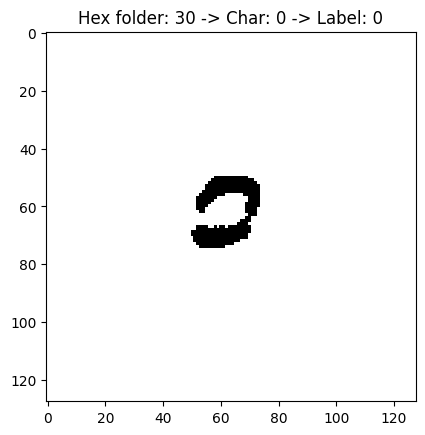

In [12]:
import cv2

root = Path("by_class/30")
hex_name = root.name.lower()  # hex_name = "30"
train_folder = root / f"train_{hex_name}"

# Convert hex string to actual character
char = chr(int(hex_name, 16))  # "30" -> 48 -> '0'
label = char_to_label(char)     # Now pass single character

img_path = next(train_folder.rglob("*.png"), None)
print(img_path)

img = cv2.imread(str(img_path), 1)
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print(type(rgb))
print(rgb.shape)
plt.imshow(rgb, interpolation='nearest')
plt.title(f"Hex folder: {hex_name} -> Char: {char} -> Label: {label}")
plt.show()

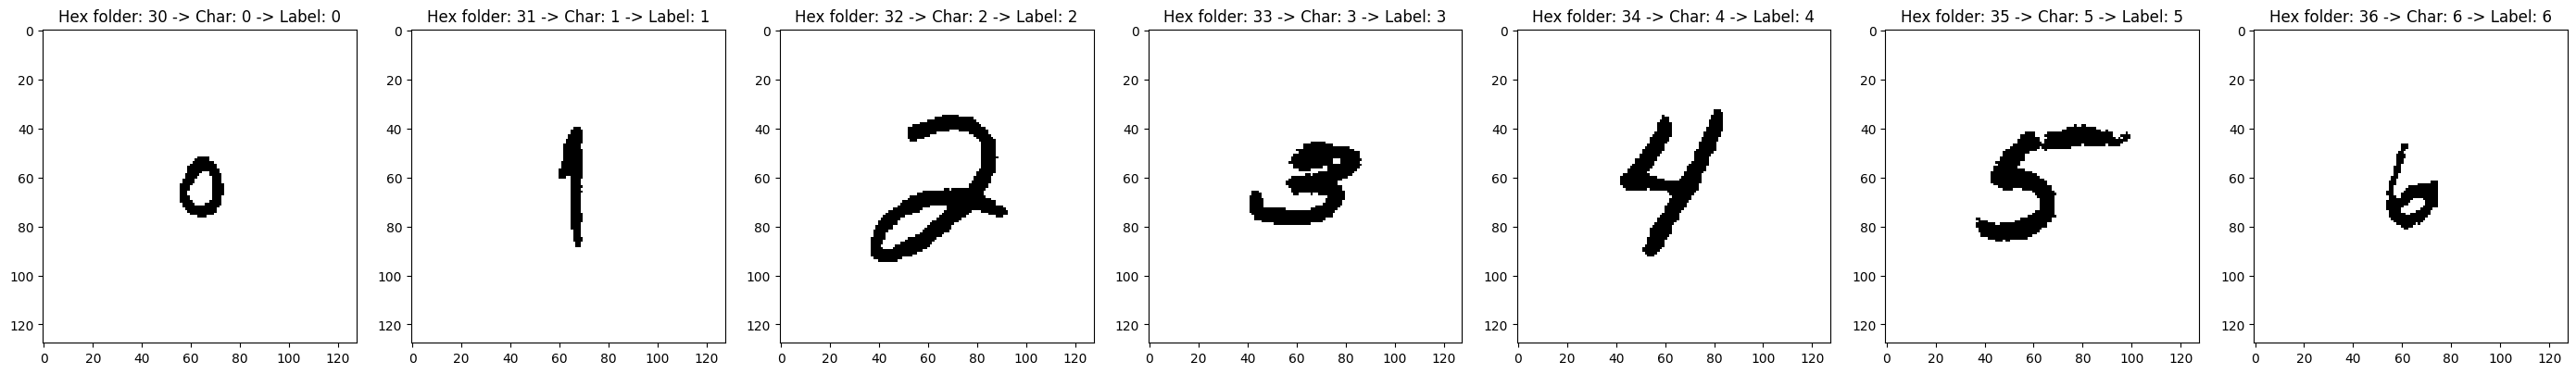

In [ ]:
def display_samples_label(root_dir: str, n_classes: int):
    root = Path(root_dir)

    fig, axes = plt.subplots(1, n_classes, figsize=(4*n_classes, 4))
    idx = 0 

    for class_dir in sorted(root.iterdir()):
        if not class_dir.is_dir():
            continue

        if idx >= n_classes:  # Stop when we've filled all subplots
            break
        
        hex_name = class_dir.name.lower()
        # print(f"hex_name: {hex_name}")
        char = hex_to_char(hex_name)
        label = char_to_label(char)
        # train_folder = root / f"train_{hex_name}"
        # print(f"train_folder: {train_folder}")

        img_path = next(class_dir.rglob("*.png"), None)
        if img_path is None:
            continue

        img = cv2.imread(str(img_path), 1)
        rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


        axes[idx].imshow(rgb_img, interpolation="nearest")
        axes[idx].set_title(f"Hex folder: {hex_name} -> Char: {char} -> Label: {label}")
        idx += 1

    plt.tight_layout()
    plt.show()

display_samples_label("by_class", n_classes=7)

In [27]:
import os
import numpy as np
from PIL import Image
from tqdm import tqdm

# =========================
# CONFIG
# =========================
ROOT = "by_class"
OUTPUT_DIR = "nist_raw_train"
IMG_SIZE = 32

os.makedirs(OUTPUT_DIR, exist_ok=True)

# =========================
# LOAD DATA
# =========================
X_train = []
y_train = []

hex_dirs = sorted(
    d for d in os.listdir(ROOT)
    if os.path.isdir(os.path.join(ROOT, d))
)

print("Found hex folders:", hex_dirs)

for hex_label in tqdm(hex_dirs):
    train_dir = os.path.join(ROOT, hex_label, f"train_{hex_label}")
    if not os.path.isdir(train_dir):
        continue

    try:
        char = hex_to_char(hex_label)
        label = char_to_label(char)
    except ValueError:
        # skip punctuation / unsupported symbols
        continue

    for fname in os.listdir(train_dir):
        if not fname.lower().endswith((".png", ".jpg", ".bmp")):
            continue

        img_path = os.path.join(train_dir, fname)

        try:
            img = Image.open(img_path)
            img = img.resize((IMG_SIZE, IMG_SIZE), Image.BILINEAR)
            img = np.array(img)  # uint8, no normalization

            X_train.append(img)
            y_train.append(label)

        except Exception as e:
            print(f"Skipping {img_path}: {e}")

# =========================
# FINAL ARRAYS
# =========================
X_train = np.array(X_train)
y_train = np.array(y_train)

print("✅ Dataset prepared using char-based labels")
print("Samples:", len(X_train))
print("X_train shape:", X_train.shape)
print("Label range:", y_train.min(), "→", y_train.max())
print("Number of classes:", len(np.unique(y_train)))


Found hex folders: ['30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '41', '42', '43', '44', '45', '46', '47', '48', '49', '4a', '4b', '4c', '4d', '4e', '4f', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '5a', '61', '62', '63', '64', '65', '66', '67', '68', '69', '6a', '6b', '6c', '6d', '6e', '6f', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '7a']


100%|██████████| 62/62 [02:32<00:00,  2.45s/it]


✅ Dataset prepared using char-based labels
Samples: 731668
X_train shape: (731668, 32, 32, 3)
Label range: 0 → 61
Number of classes: 62


In [28]:
print(np.unique(y_train))
print(len(np.unique(y_train)))  # must be 62


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61]
62


In [29]:
def label_to_char(label: int) -> str:
    if 0 <= label <= 9:
        return chr(label + ord('0'))
    elif 10 <= label <= 35:
        return chr(label - 10 + ord('A'))
    elif 36 <= label <= 61:
        return chr(label - 36 + ord('a'))
    else:
        raise ValueError("Invalid label")

i = 0
print("Label:", y_train[i])
print("Char:", label_to_char(y_train[i]))


Label: 0
Char: 0


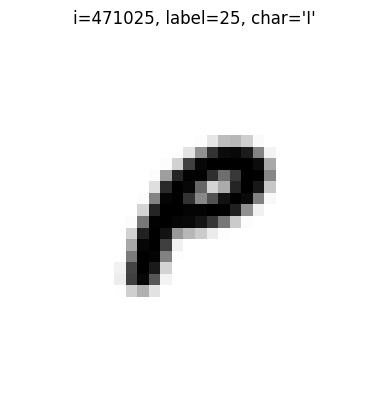

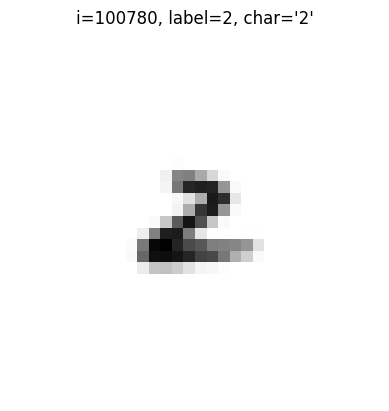

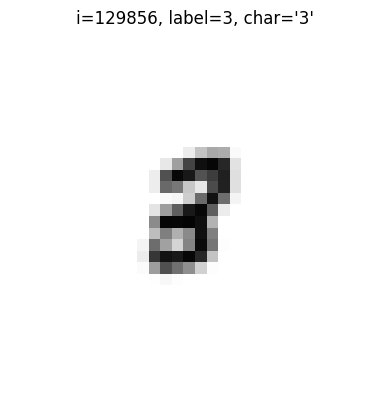

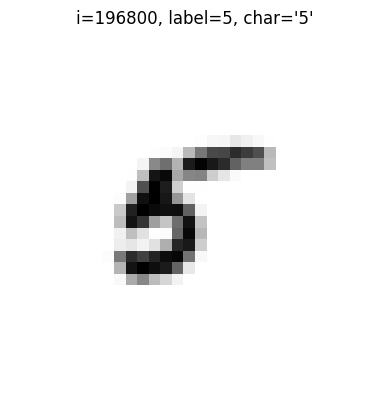

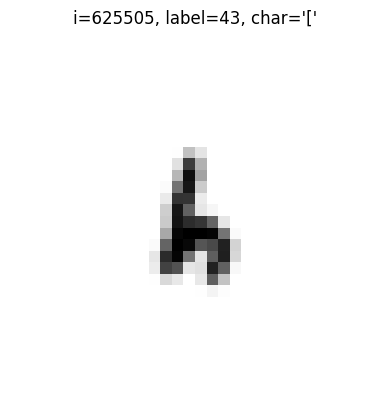

In [31]:
import random

for i in random.sample(range(len(X_train)), 5):
    img = X_train[i]
    label = y_train[i]
    char = chr(label + int("30", 16))

    plt.imshow(img if img.ndim == 3 else img, cmap="gray")
    plt.title(f"i={i}, label={label}, char='{char}'")
    plt.axis("off")
    plt.show()
